In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
plt.ion()

In [2]:
"""
job = 1: Pufferkurven mit horizontalen Linien mit % Base und % Säure
job = 2: Verhältnisberechnungen
job = 3: beides
job = 4: einfach: Pufferkurven mit horizontalen Linien nur mit % Base
job = 10 komplexe Abbildung

"""
job = 4


rote_punkte = True
pKSrp = 3.5       #pKS für die roten Punkte
         
linewidth = 1



# pKs-Listen (Für Jobs mit mehreren pKS: Jobs 1, 4, 
pKsL = [1.8,9.33,6.04]
pKsL = [4.19]
pKsL = [2.1,9.47,4.07]
#pKsL = [9.21]
#pKsL = []   # für leeres Diagramm

# pKS für Berechnungen, nicht Kurven - Jobs 2,3,10
pKs = 5.5
pH = 6
c0 = 0.4

#pH-Werte für horizontale Linien
yy = [4, 7]
yy=[] # für keine

c_max = 0.1 # wo nicht %
setting = 1 # 1 = Konzentrationen mit c_max, 2 = Prozent

konzentrationsangaben_stellen = 2 #Alternative zu Formatter

C:\Users\ursle\AppData\Local\Temp\ipykernel_3108\2347953632.py:72: RuntimeWarning: divide by zero encountered in divide
  return pKs+np.log(x/(100-x))/np.log(10)
C:\Users\ursle\AppData\Local\Temp\ipykernel_3108\2347953632.py:72: RuntimeWarning: divide by zero encountered in log
  return pKs+np.log(x/(100-x))/np.log(10)


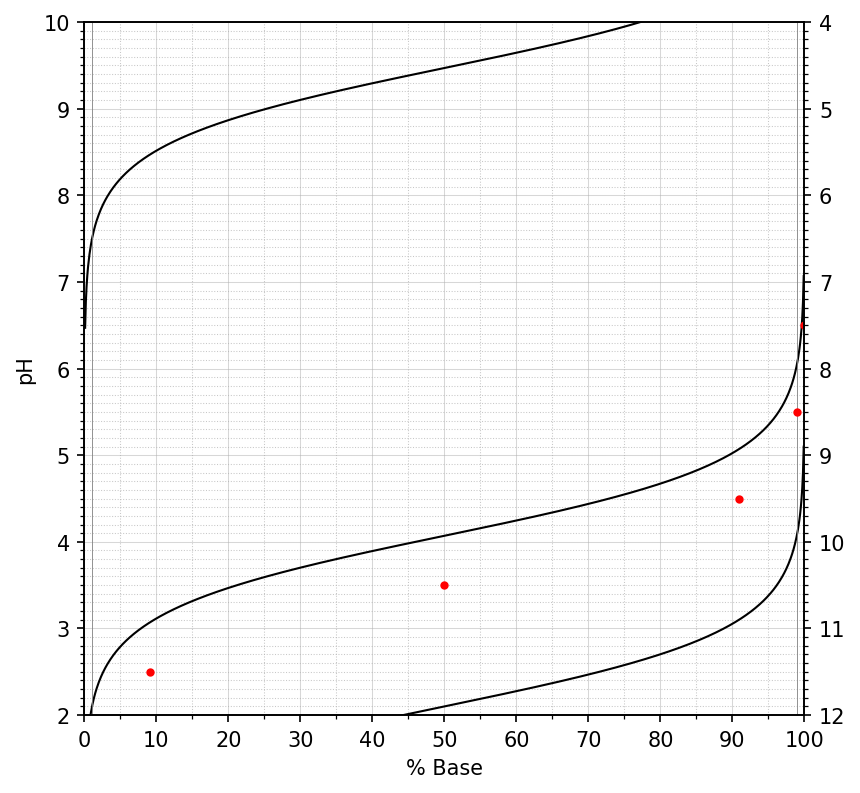

In [3]:
if setting == 1:
    # konzentration
    cmax = c_max

    # format labels der Achsen
    #formatter = '{:.0f} # keine Dezimalstellen
    #formatter = '{:.2f}' # zwei Dezimalstellen
    formatter = '{:.2f}' # zwei Dezimalstellen
    str_formatter = '%.2f' 
    fontsize = 6
    xlabels_rotation = 45
    anteil_label_base = r"$\frac{mol}{L}$ konjugierte Base"
    anteil_label_saeure = r"$\frac{mol}{L}$ konjugierte Säure"

if setting == 2:
    cmax = 100
    #prozent
    # format labels der Achsen
    #formatter = '{:.0f} # keine Dezimalstellen
    #formatter = '{:.2f}' # zwei Dezimalstellen
    formatter = '{:.0f}' 
    str_formatter = '%.0f' 
    fontsize = 8
    xlabels_rotation = 0
    anteil_label_base = r"% Anteil konjugierte Base"
    anteil_label_saeure = r"% Anteil konjugierte Säure"



###############
import matplotlib.gridspec as gridspec
if job in [1,2,3,4, 10]:
    
    #fig = plt.figure()                                                               
    #ax1 = fig.add_subplot(111) 
    
    
    xInch=6
    yInch=6
    my_dpi = 150
    fig = plt.figure(figsize = (xInch,yInch),dpi=my_dpi,facecolor=None,edgecolor=None,frameon=True, constrained_layout=False)
    
    if job in [1,2,3, 10]:
        gs=gridspec.GridSpec(3,2,hspace=0.4, left=0.3, right=0.7)
        ax1 = fig.add_subplot(gs[:,:],zorder=10)
    

    
    #um Achsen gut sichtbar zu machen:
    #ax1 = fig.add_subplot(211) 

nsteps=1000
xmin=0
xmax=100
x = np.linspace(xmin,xmax,nsteps)


if job == 2 or job == 3: 
    secondary_major_xticks =np.arange(100, -10, -10) 


if job == 10: 
    secondary_major_xticks =np.arange(100, -10, -10) 






############# Pufferkurven
def pufferkurve(x,pKs):
    return pKs+np.log(x/(100-x))/np.log(10)


def Pufferkurven(pKsL, lw = 1):
    if type(pKsL) is not list:
        pKs = [pKsL]
    for pK in pKsL:
        y=pufferkurve(x,pK)
        ax1.plot(x,y,"k-", lw = lw)

def sekundaerY(pH_max = 14):
    secondary_major_yticks = np.arange(pH_max, -1, -1)
    ax2.set_yticks(major_yticks)
    ax2.set_yticklabels(secondary_major_yticks)
    ax2.set_ylabel('pOH', color='k')
    for tl in ax2.get_yticklabels():
        tl.set_color('k')

def sekundaerX():
    #Sekundäre x-Achse
    #if cmax == 100:
        #secondary_major_xticklabels =np.array(np.arange(100, -10, -10)/100*cmax,dtype=int)

    secondary_major_xticklabels =np.round(np.array(np.arange(100, -10, -10)/100*cmax),konzentrationsangaben_stellen)
    secondary_major_xticklabels = [formatter.format(i) for i in secondary_major_xticklabels]
    # Move twinned axis ticks and label from top to bottom
    ax3.xaxis.set_ticks_position("bottom")
    ax3.xaxis.set_label_position("bottom")
    
    # Offset the twin axis below the host
    ax3.spines["bottom"].set_position(("axes", -0.13))
    
    # Turn on the frame for the twin axis, but then hide all 
    # but the bottom spine
    ax3.set_frame_on(True)
    ax3.patch.set_visible(False)
    
    for key,value in ax3.spines.items():
        value.set_visible(False)
    
    ax3.spines["bottom"].set_visible(True)
    
    ax3.set_xticks(major_xticks)
    ax3.set_xticklabels(secondary_major_xticklabels)
    
    #########

##horizontale Linien
def horizLinie(yy):
    for y in yy:
        ax1.plot([0,100],[y,y],'k-', lw=1)




if job in [1,2,3]: 
    Pufferkurven(pKsL, lw = linewidth )
    
    #Sekundäre Achsen (y und x)
    secaxis = True
    
    #Linien bei 1% und 99%
    y1p=[-0.2,14.2]
    x1p=[1,1]
    x2p=[99,99]
    ax1.plot(x1p,y1p,'k-',x2p,y1p,'k-', lw=0.4, color='grey')
    
    #plt.xlabel(u"Temperatur")
    
    #plt.ylabel("durchschnittliche Teilchengeschwindigkeit")
    ax1.set_ylabel("pH")
    #plt.title(u"")
    ax1.set_title(u" ")
    
    
    #####Ticks und Grid                                
    major_xticks = [i*100/10 for i in range(11)]                                             
    minor_xticks = np.arange(0, 100*1.01, 5)                                               
    major_yticks = np.arange(0, 15, 1)                                              
    minor_yticks = np.arange(0, 14.5, 0.1)   
    
    ax1.set_xticks(major_xticks)                                                       
    ax1.set_xticks(minor_xticks, minor=True)                                           
    ax1.set_yticks(major_yticks)                                                       
    ax1.set_yticks(minor_yticks, minor=True)     
    
    ax1.set_yticklabels(np.arange(0,15,1))
    #if cmax == 100:
        #major_xticklabels =np.array(np.arange(0, 105, 10)/100*cmax,dtype=int)

  
    major_xticklabels =np.round(np.array(np.arange(0, 105, 10)/100*cmax),konzentrationsangaben_stellen)
    major_xticklabels = [formatter.format(i) for i in major_xticklabels]
    ax1.set_xticklabels(major_xticklabels, fontsize = fontsize, rotation = xlabels_rotation)
    
      
    """                                      
    for label in ax1.yaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    """
    
    #ax1.grid(which='both')                                                            
    ax1.grid(which='major', alpha=0.5, linewidth=0.5, linestyle='-') 
    ax1.grid(which='minor', alpha=0.7, linewidth=0.5, linestyle='dotted')
    
    
    #sekundäre y-Achse
    #rechts etwas Raum geben, damit "pOH" nicht angeschnitten wird beim Zusammenrücken
    fig.subplots_adjust(right=0.8)
    ax2 = ax1.twinx()
    ax2.set_yticks([])
    
    if secaxis == True:
        # Add some extra space for the second axis at the bottom
        fig.subplots_adjust(bottom=0.18)
        ax3 = ax1.twiny()
        sekundaerY()
        sekundaerX()
        ax2.set_ylim([-0.2,14.2])
        ax2.tick_params(axis='y',labelsize=fontsize)
        ax3.set_xlim([0,100])
        ax3.tick_params(axis='x',labelsize=fontsize, rotation = xlabels_rotation)
    
    for ax in [ax1,ax2]:
        #ax.set_aspect(2)
        ax.set_ylim([-0.2,14.2])
        #ax.set_ylim([0.9,7.1])
        ax.set_xlim([0,100])

    
    ax1.tick_params(axis='y',labelsize=fontsize)
    
    horizLinie(yy)




def berechnung(pKs = 4.76, c0 = 1, pH = 7):
    verh = 10**(pH-pKs)
    HA = c0/(1+verh)
    A = HA * verh
    print("\n Berechnungsgrundlage: pKs = ",pKs,", pH = ",pH,", c0 = ",c0, "mol/L")
    print("Verhältnis = ", verh)
    print("[HA]=", HA, "mol/L")
    print("[A]=", A, "mol/L \n")
    

if job == 2 or job == 3: 
    berechnung(pKs = pKs, c0 = c0, pH = pH)

if job==1 or job == 3:
    ax1.set_xlabel(anteil_label_base , size=8)   
    ax3.set_xlabel(anteil_label_saeure , size=8)
 
if job == 4:
    
    ymin = 2
    ymax = 10
 
    gs=gridspec.GridSpec(3,2,hspace=0.4, left=0.1, right=0.9)
    ax1 = fig.add_subplot(gs[:,:],zorder=10)
    
    fontsize = 8
    cmax=c_max
    Pufferkurven(pKsL, lw = linewidth )
    
    #Linien bei 1% und 99%
    y1p=[ymin -0.2,ymax + .2]
    x1p=[1,1]
    x2p=[99,99]
    ax1.plot(x1p,y1p, ls="-", lw=0.4, color='grey')
    ax1.plot(x2p,y1p, ls="-", lw=0.4, color='grey')

    #####Ticks und Grid    
                          
    major_xticks = np.arange(0, 105, 10)                                              
    minor_xticks = np.arange(0, 105, 5)                                               
    major_yticks = np.arange(ymin, ymax+1, 1)                                              
    minor_yticks = np.arange(ymin, ymax + .1, 0.1)   
 
    ax1.set_xticks(major_xticks)                                                       
    ax1.set_xticks(minor_xticks, minor=True)                                           
    ax1.set_yticks(major_yticks)                                                       
    ax1.set_yticks(minor_yticks, minor=True)     



    
    """     
  
    #ax1.set_yticklabels(np.arange(0,15,1))
    if cmax == 100:
        major_xticklabels =np.array(np.arange(0, 105, 10)/100*cmax,dtype=int)
    else: 
        major_xticklabels =np.array(np.arange(0, 105, 10)/100*cmax)
    ax1.set_xticklabels(major_xticklabels, fontsize = fontsize)

                                    
    for label in ax1.yaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    """

    #ax1.grid(which='both')    
                                                      
    ax1.grid(which='major', alpha=0.5, linewidth=0.5, linestyle='-') 
    ax1.grid(which='minor', alpha=0.7, linewidth=0.5, linestyle='dotted')


    """ 
    ax1.tick_params(axis='y',labelsize=fontsize)
      
    ax1.xaxis.set_major_formatter(formatter) 
    ax1.xaxis.set_major_formatter(formatter)
    """ 
    horizLinie(yy)

    

    ax1.set_ylim([ymin,ymax])
    ax1.set_xlim([0,100])
    ax1.set_ylabel("pH")

    sec_ax = True
    if sec_ax:
        ax2 = ax1.twinx()
        major_yticks2 = np.arange(ymin, ymax+1, 1)                                              
        minor_yticks2 = np.arange(ymin, ymax + .1, 0.1) 
        ax2.set_ylim([ymin,ymax])
        major_ytick2labels = 14 - major_yticks2
        ax2.set_yticks(major_yticks2)                                                       
        ax2.set_yticks(minor_yticks2, minor=True)    
        ax2.set_yticklabels(major_ytick2labels)   

    beschriftung = 0
    # Konzentration oder Prozent
    if beschriftung == 0:
        ax1.set_xlabel("% Base")
    elif beschriftung == 1:
        ax1.set_xlabel("mol/L Base")
        ticks = ax1.get_xticks()
        x_ticklabels = [f"{t/100*cmax:.2f}" for t in ticks]
        ax1.set_xticklabels(x_ticklabels)      
        
    plt.savefig("einfache_pufferkurve.png")

if job == 10:
    cmax=c_max
    Pufferkurven([4.76], lw = linewidth )
    
    #Sekundäre Achsen (y und x)
    secaxis = True
    
    #Linien bei 1% und 99%
    y1p=[-0.2,14.2]
    x1p=[1,1]
    x2p=[99,99]
    ax1.plot(x1p,y1p,ls='-',lw=0.4, color='grey')
    ax1.plot(x2p,y1p,ls='-',lw=0.4, color='grey')
    #plt.xlabel(u"Temperatur")
    
    #plt.ylabel("durchschnittliche Teilchengeschwindigkeit")
    ax1.set_ylabel("pH")
    #plt.title(u"")
    ax1.set_title(u" ")

    
    #####Ticks und Grid                                
    major_xticks = np.arange(0, 105, 10)                                              
    minor_xticks = np.arange(0, 105, 5)                                               
    major_yticks = np.arange(0, 13, 1)                                              
    minor_yticks = np.arange(0, 12.5, 0.5)   
    
    ax1.set_xticks(major_xticks)                                                       
    ax1.set_xticks(minor_xticks, minor=True)                                           
    ax1.set_yticks(major_yticks)                                                       
    ax1.set_yticks(minor_yticks, minor=True)     
    
    #ax1.set_yticklabels(np.arange(0,15,1))
    if cmax == 100:
        major_xticklabels =np.array(np.arange(0, 105, 10)/100*cmax,dtype=int)
    else: 
        major_xticklabels =np.array(np.arange(0, 105, 10)/100*cmax)
    ax1.set_xticklabels(major_xticklabels, fontsize = fontsize)
    """                                      
    for label in ax1.yaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    """
    
    #ax1.grid(which='both')                                                            
    ax1.grid(which='major', alpha=0.5, linewidth=0.5, linestyle='-') 
    ax1.grid(which='minor', alpha=0.7, linewidth=0.5, linestyle='dotted')
    

    
      
    
    #sekundäre y-Achse
    #rechts etwas Raum geben, damit "pOH" nicht angeschnitten wird beim Zusammenrücken
    fig.subplots_adjust(right=0.8)
    ax2 = ax1.twiny()
    
                        
    if secaxis == True:
        # Add some extra space for the second axis at the bottom
        fig.subplots_adjust(bottom=0.18)
        ax3 = ax1.twiny()
        sekundaerY(pH_max=12)
        sekundaerX()
        ax3.set_xlim([0,100])
        ax3.tick_params(axis='x',labelsize=fontsize) 
    
    for ax in [ax1,ax2]:
        #ax.set_aspect(2)
        ax.set_ylim([-0.2,10.2])
        #ax.set_ylim([0.9,7.1])
        ax.set_xlim([0,100])    

    #ax2.set_yticks([])
    ax2.tick_params(axis='y',labelsize=fontsize)  
    ax1.tick_params(axis='y',labelsize=fontsize)

    format_variante = 0
    if format_variante == 0:
        for ax in [ax1,ax3]:
            # Multiplikation ×100
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x / 100 * cmax:.2f}"))
            #ax3.xaxis.set_major_formatter(FormatStrFormatter( str_formatter )) 
            #ax1.xaxis.set_major_formatter(FormatStrFormatter(str_formatter))
            #major_xticklabels = [formatter.format(i) for i in major_xticklabels]
            for label in ax.get_xticklabels():
                label.set_fontsize(fontsize)
                label.set_rotation(45)
                label.set_color("black")
    elif format_variante == 1:
        major_xticklabels =np.round(np.array(np.arange(0, 105, 10)/100 * cmax),konzentrationsangaben_stellen)
        major_xticklabels_inv = np.copy(major_xticklabels[::-1])
        ax3.set_xticklabels(major_xticklabels_inv, fontsize = fontsize, rotation = xlabels_rotation)
        ax1.set_xticklabels(major_xticklabels, fontsize = fontsize, rotation = xlabels_rotation)
        #ax2.set_xticklabels(major_xticklabels, fontsize = fontsize, rotation = xlabels_rotation)
    elif format_variante == 2: 
        for ax in [ax1,ax3]:
            ticks = ax.get_xticks()
            x_ticklabels = [f"{t/100*cmax:.2f}" for t in ticks]
            if ax == ax3:
                x_ticklabels = x_ticklabels[::-1]
            ax.set_xticklabels(x_ticklabels)

    ax2.set_yticks (np.arange(0,11,1))
    yticks = ax2.get_yticks()
    pOH_ticklabels = [14-t for t in yticks]
    ax2.set_yticklabels(pOH_ticklabels)
        

    berechnung(pKs = pKs, c0 = c0, pH = pH)

    
    ax1.text(110,-0.8,r"$\frac{mol}{L}$ $CH_3COO^-$",verticalalignment='center', horizontalalignment='left', size=9)
    ax3.text(110,-2.,r"$\frac{mol}{L}$ $CH_3COOH$",verticalalignment='center',  horizontalalignment='left', size=9)
    ax1.text(50,7.4,r"$CH_3COO^-$", horizontalalignment='center',bbox=dict(facecolor='w',edgecolor='w', alpha=1))
    ax1.text(50,2,r"$CH_3COOH$", horizontalalignment='center',bbox=dict(facecolor='w',edgecolor='w', alpha=1))

    ax1.plot([50,90.9090],[4.76,5.76],'ro')
    ax1.arrow(50,4.76,40.90909,0,length_includes_head=True, head_length=3, ec='blue',fc= 'blue', head_width=0.2)
    ax1.arrow(90.90909,4.76,0,1,length_includes_head=True, head_length=0.5, ec='blue',fc= 'blue', head_width=1.4)
    ax1.arrow(50,-0.2,40.90909,0,length_includes_head=True,width = 0.05, head_length=3, ec='blue',fc= 'blue', head_width=0.2,clip_on=False,zorder=100)
    ax1.arrow(0,4.76,0,1,length_includes_head=True, width = 0.2, head_length=0.5, ec='blue',fc= 'blue', head_width=1.4,clip_on=False,zorder=200)
    #ax1.set_xlabel(r"$\frac{mol}{L}$ $CH_3COO^-$")
    #ax3.set_xlabel(r"$\frac{mol}{L}$ $CH_3COOH$")
    ax1.plot([0,50],[4.76,4.76],'b--',lw=0.5,zorder=1)
    ax1.plot([0,90.9090],[5.76,5.76],'b--',lw=0.5,zorder=1)
    ax1.plot([50,50],[4.76,0],'b--',lw=0.5,zorder=1)
    ax1.plot([90.9090,90.9090],[5.76,0],'b--',lw=0.5,zorder=1)

    
    
    for i in range(10):
        zahl = '{:.14f}'.format(10**-i).rstrip('0')
        ax.text(-45,i,zahl,verticalalignment='center',horizontalalignment='left', size=9)
    ax.text(-45,10,r'$[H_3O^+]$', size=9)

    
 
if rote_punkte == True:
    xxx = np.array([0.05,0.09090909,0.0990099,0.0999000999000999, 0.009090909,0.000990099,0.0000999001])*1000
    ax1.plot(xxx,[pKSrp,pKSrp+1,pKSrp+2,pKSrp+3,pKSrp-1,pKSrp-2,pKSrp-3],'ro', ms = 3)  
    
plt.savefig("pufferkurve.png")
plt.show()